<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/dev/Copy_of_PracticeSession2_CNN_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 5.3 - Convolutional Neural Network

This notebook contains all demo codes in Section 5.3.

The goal of this session is to help you 

1. understand how to use CNN for the image classification;
2. implement CNN to empirical datasets using Keras;
3. fine tune your CNN models to achieve better performance.


![alt text](https://docs.google.com/uc?export=download&id=1oXzt8ryDo_gkzI_78jXLvSkx7qLdqqb-)



## Image Classification using Convolutional Neural Networks (CNN)

1. **Dataset**: $\mathcal{D} = (X_i, Y_i)_{i=1}^{N}$,
where 
 * Input: Image Data $X$ with dimension (width, height, depth = 3).

 * Output: Objects in images $Y$ (represented in one hot vector). 

2. **CNN Model**: $f_{\theta}(X, Y) = P(Y\vert X)$.

 * Input Layer: Image Data (3D tensor - (width, height, depth))

 *  Ouput Layer: A vector of the length being the number of classes (no of classes, 10). 

 * Building blocks of CNNs
 
        (1) Convolutional Layer;
 
        (2) Pooling Layer;
 
        (3) Fully connected (Dense) Layer. 


3. ** Loss Function**: 
\begin{eqnarray*}
L(\theta \vert \mathcal{D})  = - \frac{1}{N}\sum_{i=1}^{N}\log P(Y_{i}\vert X_{i}) = - \frac{1}{N} \sum_{i = 1}^{N}\langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle, .
\end{eqnarray*}

  where $y_i$ is a one-hot vector.  

4. ** Optimization**: 
\begin{eqnarray*}
\theta^{*} = \arg\min_{\theta} L(\theta \vert \mathcal{D}) .
\end{eqnarray*}

5. ** Prediction**: 

\begin{eqnarray*}
\hat{Y}_{new} = \arg\max_{y} f_{\theta^{*}}  (X_{new}, y) .
\end{eqnarray*}

6. **Test and Validation**:  e.g. the accuracy of the estimated model, i.e.

\begin{eqnarray*}
\frac{\sum_{i=1}^{N}1(Y_{i} == \hat{Y}_{i})}{N}.
\end{eqnarray*}


## Pre-process Cifar10 Dataset

In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# Import Cifar10 dataset
(x_cifar10_train, y_cifar10_train), (x_cifar10_test, y_cifar10_test) = cifar10.load_data()

# Normalize the input data
x_train = x_cifar10_train.astype('float32')/255
x_test = x_cifar10_test.astype('float32')/255

# Convert class vectors to one-hot vector matrices
num_classes = 10
y_train = to_categorical(y_cifar10_train, num_classes)
y_test = to_categorical(y_cifar10_test, num_classes)


Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


##Implement CNN for Classification Using Lenet Architecture

**LeNet CNN Model Architecture**

![alt text](https://docs.google.com/uc?export=download&id=175hXfs1m6v3e3NRVoKN7b51aSxe06xNA)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import time

# fix seed
import numpy
import tensorflow
numpy.random.seed(0)
tensorflow.random.set_seed(1)

# Build the first LeNet model
def Lenet_Model_BaseLine(n_hidden_neurons):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # Add two convolutional layers and pooling layers in turn
    model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32,3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(n_hidden_neurons, (3,3), activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # flatten the image data into a vector
    model.add(Flatten())
    model.add(Dense(512, activation ='relu'))
    model.add(Dense(10, activation ='softmax'))
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

n_hidden_neurons = 64
batch_size =128
epochs = 40

Lenet_Model = Lenet_Model_BaseLine(n_hidden_neurons)
print(Lenet_Model.summary())
hist_Lenet_Model= Lenet_Model.fit(x_train, y_train, epochs=epochs,  batch_size = 32, validation_data=(x_test, y_test), verbose=1)


Compiling Model ... 
Model compield in 6.999392986297607 seconds
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1180160   
_________________________________________________________

In [3]:
score = Lenet_Model.evaluate(x_test, y_test)
print(Lenet_Model.metrics_names)
print('Test ' + Lenet_Model.metrics_names[0] , score[0])
print('Test '+ Lenet_Model.metrics_names[1] , score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.7680 - acc: 0.7008
['loss', 'acc']
Test loss 1.7680072784423828
Test acc 0.7008000016212463


##Plot the Fitting Result

In [0]:
from matplotlib import pyplot as plt    

# Define functions to plot the loss and accuracy
def plot_hist_loss(hist):
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  
def plot_hist_accuracy(hist):
  plt.figure()
  plt.plot(hist.history['acc'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_acc'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

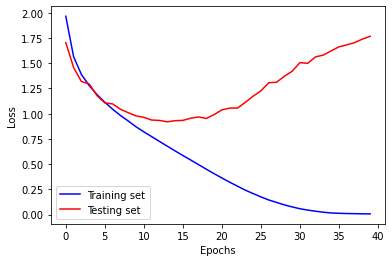

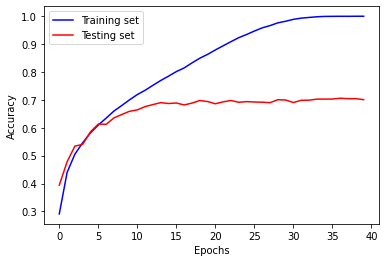

In [5]:
plot_hist_loss(hist_Lenet_Model)
plot_hist_accuracy(hist_Lenet_Model)

##Some Tips to Train CNN Model

The overfitting issue might occur when applying very sophisocated CNN or other deep learning models. There are several popular ways to deal with the overfitting issue:
*   Dropout
*   Data Augmentation
*  Weight regularization

##Data Augumentation###

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation needs a large number of epochs
iterations = 391
epochs = 160

datagen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.125, height_shift_range=0.125, fill_mode='constant',cval=0)
datagen.fit(x_train)

# start train
Lenet_da_Model  = Lenet_Model_BaseLine(n_hidden_neurons)
hist_Lenet_da = Lenet_da_Model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                        steps_per_epoch=iterations,
                        epochs=epochs, 
                        validation_data=(x_test, y_test))

Compiling Model ... 
Model compield in 0.05798602104187012 seconds
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/160
391/391 [==============================] - 20s 52ms/step - loss: 2.2278 - acc: 0.1831 - val_loss: 2.0745 - val_acc: 0.2603
Epoch 2/160
391/391 [==============================] - 20s 51ms/step - loss: 2.0106 - acc: 0.2783 - val_loss: 1.9262 - val_acc: 0.3183
Epoch 3/160
391/391 [==============================] - 20s 52ms/step - loss: 1.9090 - acc: 0.3187 - val_loss: 1.7982 - val_acc: 0.3752
Epoch 4/160
391/391 [==============================] - 20s 51ms/step - loss: 1.8059 - acc: 0.3590 - val_loss: 1.7007 - val_acc: 0.4008
Epoch 5/160
391/391 [==============================] - 20s 52ms/step - loss: 1.7130 - acc: 0.3866 - val_loss: 1.5925 - val_acc: 0.4371
Epoch 6/160
391/391 [==============================] - 20s 51ms/step - loss: 1.6421 - acc: 0.4090 - val_loss: 1.5386 - val_acc: 0.4450
Epoch 7/160
391/391 [==========================

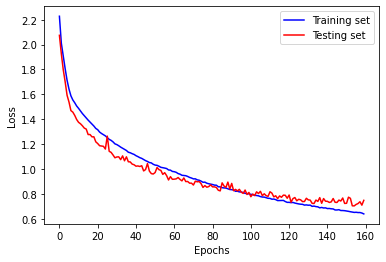

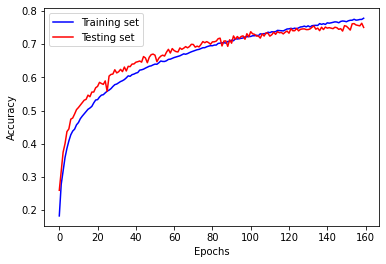

In [7]:
plot_hist_loss(hist_Lenet_da)
plot_hist_accuracy(hist_Lenet_da)

In [8]:
score = Lenet_da_Model.evaluate(x_test, y_test)
score[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.7480 - acc: 0.7507


0.7506999969482422

##Dropout




In [0]:
from tensorflow.keras.layers import Dropout
def Lenet_dp_Model(n_hidden_neurons, dropout_rate):
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(n_hidden_neurons, (3, 3), input_shape=(32,32, 3),activation = 'relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(n_hidden_neurons, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))
 
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation = 'softmax'))
    
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

In [10]:
dropout_rate = 0.25
Ldp = Lenet_dp_Model(n_hidden_neurons,dropout_rate)
print(Ldp.summary())
hist_Ldp_Model= Ldp.fit(x_train, y_train, epochs=epochs, batch_size = batch_size, validation_data=(x_test, y_test), verbose=1)


Compiling Model ... 
Model compield in 0.0940096378326416 seconds
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
______________________________________________________

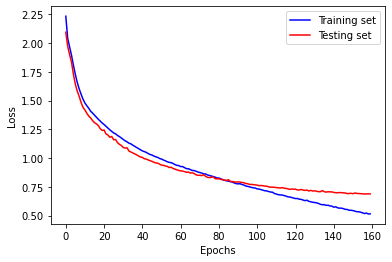

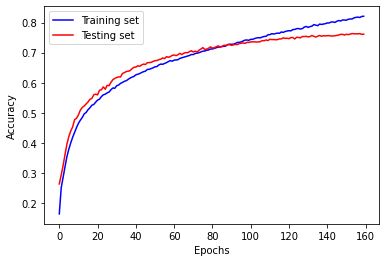

In [11]:
plot_hist_loss(hist_Ldp_Model)
plot_hist_accuracy(hist_Ldp_Model)

Grid Search to find optimal dropout rate 

In [12]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create model
model = KerasClassifier(build_fn=Lenet_dp_Model , n_hidden_neurons=32,  epochs=160, batch_size=128, verbose=0)
# define the grid search parameters
dropout_rate = [0.1, 0.25, 0.5]
param_grid = dict(dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.08915877342224121 seconds
Compiling Model ... 
Model compield in 0.08883547782897949 seconds
Compiling Model ... 
Model compield in 0.0835418701171875 seconds
Compiling Model ... 
Model compield in 0.09728717803955078 seconds
Compiling Model ... 
Model compield in 0.0810999870300293 seconds
Compiling Model ... 
Model compield in 0.0979917049407959 seconds
Compiling Model ... 
Model compield in 0.08882737159729004 seconds
Compiling Model ... 
Model compield in 0.09298467636108398 seconds
Compiling Model ... 
Model compield in 0.08196783065795898 seconds
Compiling Model ... 
Model compield in 0.09082698822021484 seconds
Compiling Model ... 
Model compield in 0.08218240737915039 seconds
Compiling Model ... 
Model compield in 0.08567476272583008 seconds
Compiling Model ... 
Model compield in 0.09076404571533203 seconds
Compiling Model ... 
Model compield in 0.0910181999206543 seconds
Compiling Model ... 
Model compield in 0.09015083312988281 seconds

##Weight Regularization ###

In [13]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers

def Lenet_Model_WeightRegularization (regRate):
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3,3), activation = 'relu', kernel_regularizer=regularizers.l1(regRate)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=regularizers.l1(regRate), activation = 'relu'))
    model.add(Dense(10, activation ='softmax'))
   
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model
  
model = KerasClassifier(build_fn=Lenet_Model_WeightRegularization, epochs = 40, batch_size = 1024)

param_grid = dict(regRate = [0, 0.001, 0.002])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.06442499160766602 seconds
Epoch 1/40
40/40 [==============================] - 1s 36ms/step - loss: 2.2997 - acc: 0.0908
Epoch 2/40
40/40 [==============================] - 1s 35ms/step - loss: 2.2906 - acc: 0.1262
Epoch 3/40
40/40 [==============================] - 1s 36ms/step - loss: 2.2818 - acc: 0.1510
Epoch 4/40
40/40 [==============================] - 1s 35ms/step - loss: 2.2707 - acc: 0.1831
Epoch 5/40
40/40 [==============================] - 1s 35ms/step - loss: 2.2574 - acc: 0.1889
Epoch 6/40
40/40 [==============================] - 1s 36ms/step - loss: 2.2405 - acc: 0.2095
Epoch 7/40
40/40 [==============================] - 1s 35ms/step - loss: 2.2192 - acc: 0.2210
Epoch 8/40
40/40 [==============================] - 1s 35ms/step - loss: 2.1894 - acc: 0.2356
Epoch 9/40
40/40 [==============================] - 1s 35ms/step - loss: 2.1552 - acc: 0.2425
Epoch 10/40
40/40 [==============================] - 1s 36ms/step - loss: 2.1158 - acc:

Useful Link:  [How to Grid Search Hyperparameters](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

## Other Aspects

The sucess of the optimization scheme depends on several aspects:

    Data - Normalization.
    Optimizor
    Parameter initialization


###Normalization###

[Keras link](https://keras.io/layers/normalization/)

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

In [0]:
from tensorflow.keras.layers import BatchNormalization, Activation
import time
def Lenet_Model_batch_norm():
    start_time = time.time()
    print('Compiling Model ... ')

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax'))
    
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

Compiling Model ... 
Model compield in 0.16516876220703125 seconds
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 15, 15, 32)        0         
____________________________________________________

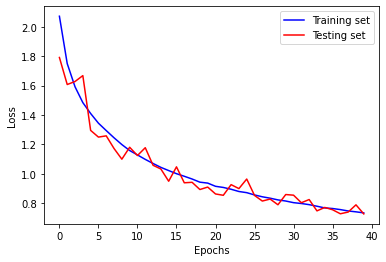

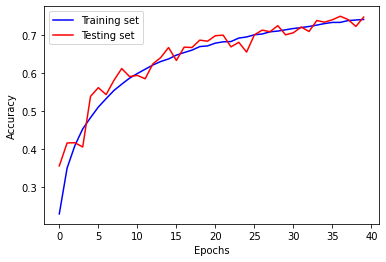

In [15]:
Lenet_Model_batch_norm1 = Lenet_Model_batch_norm()
print(Lenet_Model_batch_norm1.summary())

hist_Lenet_Model_batch_norm= Lenet_Model_batch_norm1.fit(x_cifar10_train, y_train, epochs=40, batch_size = batch_size, validation_data=(x_cifar10_test, y_test), verbose=1)
plot_hist_loss(hist_Lenet_Model_batch_norm)
plot_hist_accuracy(hist_Lenet_Model_batch_norm)

###Optimizer###

Optimizor

   1.  Method, e.g. SGD, Adam...
   
   2. Related Parameters, .e.g batch_size, epochs...

[Keras Link](https://keras.io/optimizers/)

Popular optimazation methods include:

1.   Stochastic Grid Descent(SGD);
2.   Adaptive Gradient Algorithm (AdaGrad);
3.   Root Mean Square Propagation (RMSProp)

More information can be found in  [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).


In [0]:
from keras.optimizers import RMSprop, SGD

${\color{red}Homework}$: Use GridSearch to try out different optimization methods and choose the best one.  

###Weight initialization ###

[Keras Link](https://keras.io/initializers/)

init = ['glorot_uniform', 'normal', 'uniform']


${\color{red}Homework}$: Use GridSearch to try out different weight initialziation methods and choose the best one.  

# Future Work

[Rodrigo Benenson's Blog](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)


![alt text](https://docs.google.com/uc?export=download&id=1gbnaifDszhZ9ivWx4hWob93XGAp5o4kb)
